# Dataset Overview

The insurance.csv dataset contains information about individuals' age, gender, BMI, number of children, smoking status, and region of residence, as well as the associated insurance charges

* Age: The age of the customer. (Integer)
* Children: The number of children the customer has. (Integer)
* Smoker: Whether or not the customer is a smoker. (Boolean)
* Region: The region the customer lives in. (String)
* Charges: The insurance charges for the customer. (Float)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading CSV & General Data Analysis

In [7]:
df = pd.read_csv('insurance.csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [6]:
df.dtypes

index         int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Exploratory Data Analysis

In [8]:
df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### The Dataset has no null values

## Finding correlation between numerical features

In [9]:
df.corr()

,index,age,bmi,children,charges
index,1.000000,-0.031467,-0.036169,0.025221,-0.003373
age,-0.031467,1.000000,0.109272,0.042469,0.299008
bmi,-0.036169,0.109272,1.000000,0.012759,0.198341
children,0.025221,0.042469,0.012759,1.000000,0.067998
charges,-0.003373,0.299008,0.198341,0.067998,1.000000


## Splitting into Independent & Target Feature

In [11]:
X = df.drop(['index', 'charges'], axis = 1)
y = df['charges']

In [12]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [13]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Box plotting Numerical Features

In [14]:
numerical_features = [feature for feature in X.columns if X[feature].dtype != 'object']
numerical_features

['age', 'bmi', 'children']

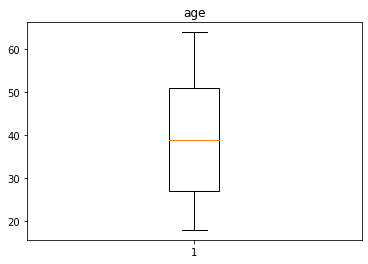

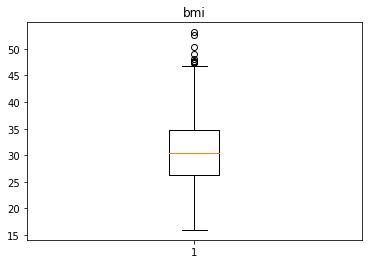

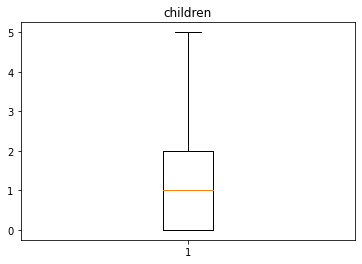

In [15]:
for feature in numerical_features:
    plt.boxplot(X[feature])
    plt.title(feature)
    plt.show()

## Checking 'region' feature

In [17]:
X['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Model Development using Linear Regression

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [27]:
pipeline = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore')),('scaler', StandardScaler(with_mean=False)),  ('linear', LinearRegression())])

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('scaler', StandardScaler(with_mean=False)),
                ('linear', LinearRegression())])

## Evaluation

In [30]:
from sklearn.metrics import r2_score

In [31]:
y_pred = pipeline.predict(X_train)

In [32]:
r2_score(y_train, y_pred)

0.8891793823691225

### Plotting Residuals

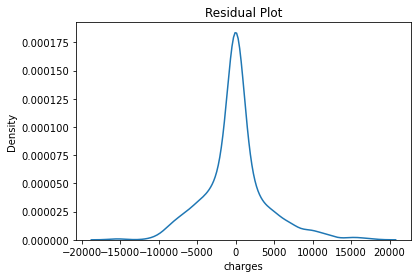

In [34]:
sns.kdeplot(y_train-y_pred).set(title='Residual Plot')
plt.show()